# Importing of Datasets and data cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv(r'C:\Users\User\Downloads\train_data.csv')
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [3]:
test=pd.read_csv(r'C:\Users\User\Downloads\test_data.csv')
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [4]:
train.dtypes

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted       object
Building_Fenced        object
Garden                 object
Settlement             object
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows        object
Geo_Code               object
Claim                   int64
dtype: object

In [5]:
train.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [6]:
test.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

In [7]:
train.shape#To view the sizes of the rows and columns

(7160, 14)

In [8]:
train.dropna(inplace=True)#Drop the Non available values
train.isna().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [9]:
train.shape

(6543, 14)

In [10]:
# Encoding text values to numeric for train dataset
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder() #create instance for labelencoder
train['Building_Painted']=number.fit_transform(train['Building_Painted'].astype('str')) #0 means painted,1 means not painted
train['Building_Fenced']=number.fit_transform(train['Building_Fenced'].astype('str')) #0 means fenced,1 means not fenced
train['Garden']=number.fit_transform(train['Garden'].astype('str'))#0 means has no garden,1 means has garden
train['Settlement']=number.fit_transform(train['Settlement'].astype('str'))# 0 means Rural area,1 means urban area
train.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,0,1,1,1,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,1,0,0,0,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,0,1,1,1,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,1,1,1,1,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,1,0,0,0,680.0,1,1800.0,3,1053,0


In [11]:
# Encoding text values to numeric for test dataset
number=LabelEncoder() #create instance for labelencoder
test['Building_Painted']=number.fit_transform(test['Building_Painted'].astype('str')) #0 means painted,1 means not painted
test['Building_Fenced']=number.fit_transform(test['Building_Fenced'].astype('str')) #0 means fenced,1 means not fenced
test['Garden']=number.fit_transform(test['Garden'].astype('str'))#0 means has no garden,1 means has garden
test['Settlement']=number.fit_transform(test['Settlement'].astype('str'))# 0 means Rural area,1 means urban area
test.drop(['Geo_Code','NumberOfWindows'], axis=1, inplace=True)
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy
0,H11920,2013,1.000000,0,1,0,0,0,300.0,1,1960.0
1,H11921,2016,0.997268,0,1,0,0,0,300.0,1,1960.0
2,H9805,2013,0.369863,0,1,1,1,1,790.0,1,1960.0
3,H7493,2014,1.000000,0,1,0,0,0,1405.0,1,2004.0
4,H7494,2016,1.000000,0,1,0,0,0,1405.0,1,2004.0


# The explanation for the encoded variables
Building_Painted- 0 means painted,1 means not paint  
Building_Fenced-0 means fenced,1 means not fenced  
Garden-0 means has no garden,1 means has garden  
Settlement-0 means Rural area,1 means urban area  

In [12]:
train.dtypes

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted        int32
Building_Fenced         int32
Garden                  int32
Settlement              int32
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows        object
Geo_Code               object
Claim                   int64
dtype: object

In [13]:
correlations = train.corr()['Claim'].sort_values()
print(correlations)

Garden               -0.049704
Settlement           -0.049704
Building_Fenced      -0.049142
YearOfObservation    -0.017600
Date_of_Occupancy     0.018604
Building_Painted      0.036131
Residential           0.066630
Insured_Period        0.101631
Building_Type         0.114202
Building Dimension    0.298525
Claim                 1.000000
Name: Claim, dtype: float64


In [14]:
train.drop(['Customer Id','Geo_Code','NumberOfWindows'], axis=1, inplace=True)
train.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,Claim
0,2013,1.0,0,0,1,1,1,290.0,1,1960.0,0
1,2015,1.0,0,1,0,0,0,490.0,1,1850.0,0
2,2014,1.0,0,0,1,1,1,595.0,1,1960.0,0
3,2013,1.0,0,1,1,1,1,2840.0,1,1960.0,0
4,2014,1.0,0,1,0,0,0,680.0,1,1800.0,0


## DATA VISUALIZATION

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002269158F788>,
      dtype=object)

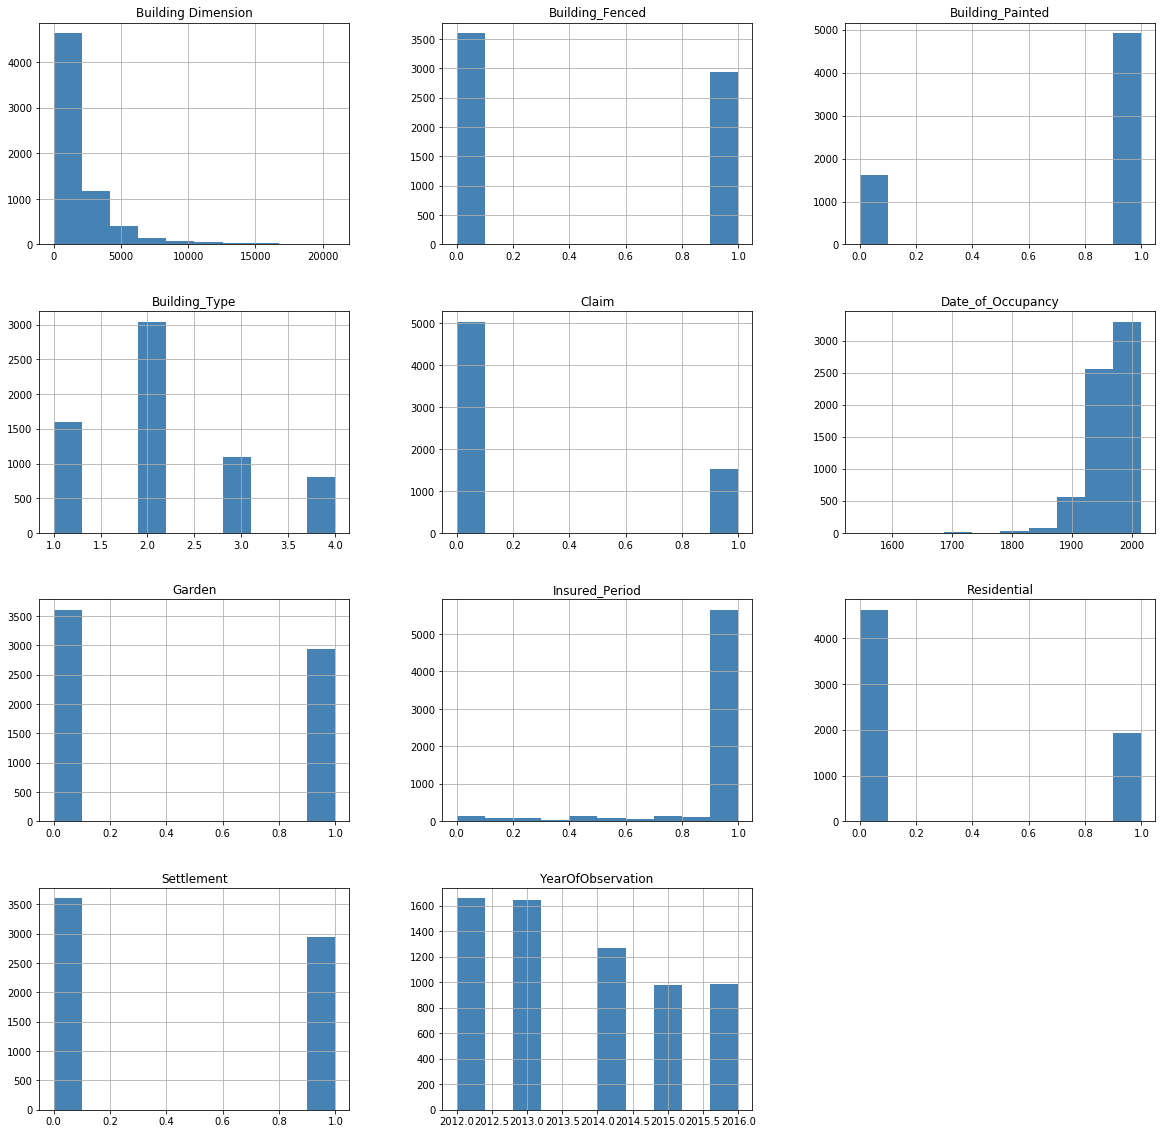

In [15]:
train.hist(figsize=(20,20), color="steelblue")

Clear visualization of the sizes of each variable

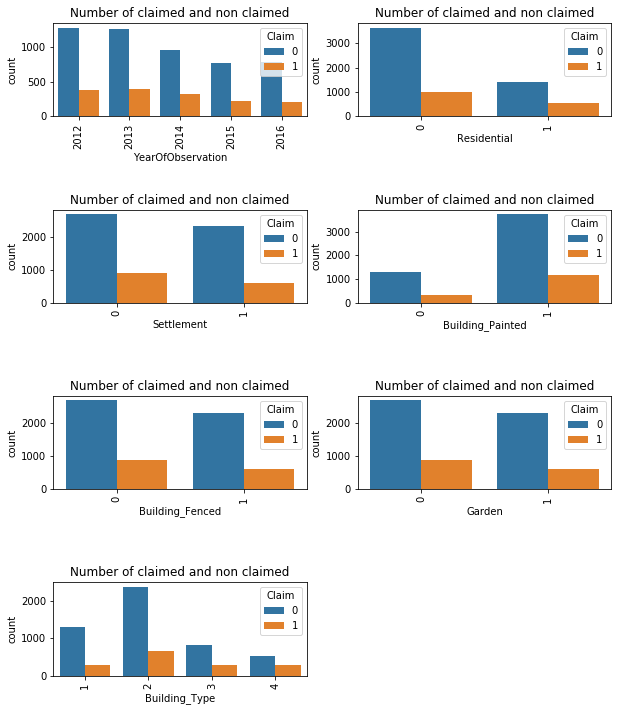

In [17]:
import seaborn as sns
features=['YearOfObservation','Residential','Settlement', 'Building_Painted','Building_Fenced','Garden','Building_Type',]
fig=plt.subplots(figsize=(10,12))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = train, hue='Claim')
    plt.xticks(rotation=90)
    plt.title("Number of claimed and non claimed")


From the plot there are more number building that doesn’t have a claim over the insured period,from all the variables

## MODEL EVALUATION

In [18]:
from sklearn.model_selection import train_test_split  
X = train.drop("Claim",axis=1)
Y = train["Claim"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((4580, 10), (1963, 10), (4580,), (1963,))

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.09469969 0.07734362 0.01564491 0.01041025 0.00256474 0.00187152
 0.00190462 0.55665203 0.04759846 0.19131018]


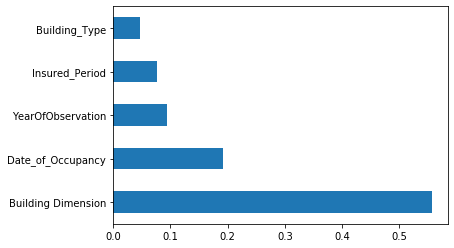

In [20]:
#plot graph of feature importances for better visualization
from sklearn.ensemble import ExtraTreesClassifier
importantfeat = ExtraTreesClassifier()
importantfeat.fit(X,Y)
print(importantfeat.feature_importances_)
feat_importances = pd.Series(importantfeat.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()


In [21]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
classifier.fit(X_train, Y_train)  
predictions = classifier.predict(X_test)
print(predictions)
print(classification_report(Y_test,predictions ))  
print(accuracy_score(Y_test, predictions ))

[0 0 0 ... 0 0 1]
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1496
           1       0.46      0.26      0.33       467

    accuracy                           0.75      1963
   macro avg       0.63      0.58      0.59      1963
weighted avg       0.72      0.75      0.72      1963

0.7508914926133469


In [22]:
from sklearn.metrics import roc_curve #for Random Forest Classifier
from sklearn.metrics import roc_auc_score
pred_prob1 = classifier.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(Y_test, pred_prob1[:,1], pos_label=1)
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
auc_score1 = roc_auc_score(Y_test, pred_prob1[:,1])
print(auc_score1)

0.6592576635481914


In [23]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model.fit(X_train,Y_train)
predictions2=model.predict(X_test)
print(predictions2)
print(classification_report(Y_test,predictions2 ))  
print(accuracy_score(Y_test, predictions2 ))

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.78      0.98      0.87      1496
           1       0.67      0.12      0.20       467

    accuracy                           0.78      1963
   macro avg       0.72      0.55      0.54      1963
weighted avg       0.75      0.78      0.71      1963

0.7763627101375445


In [24]:
pred_prob2 = model.predict_proba(X_test)#ROC_AUC for Logistic Regression
fpr2, tpr2, thresh2 = roc_curve(Y_test, pred_prob2[:,1], pos_label=1)
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
auc_score2 = roc_auc_score(Y_test, pred_prob2[:,1])
print(auc_score2)

0.6999378785970296


In [25]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors = 4)
model2.fit(X_train,Y_train)
prediction3=model2.predict(X_test)
print(classification_report(Y_test,prediction3 ))  
print(accuracy_score(Y_test, prediction3 ))

              precision    recall  f1-score   support

           0       0.78      0.95      0.85      1496
           1       0.44      0.13      0.20       467

    accuracy                           0.75      1963
   macro avg       0.61      0.54      0.53      1963
weighted avg       0.70      0.75      0.70      1963

0.7539480387162506


In [26]:
pred_prob3 = model2.predict_proba(X_test)#ROC_AUC for KNeighborsClassifier
fpr3, tpr3, thresh3 = roc_curve(Y_test, pred_prob3[:,1], pos_label=1)
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)
auc_score3 = roc_auc_score(Y_test, pred_prob3[:,1])
print(auc_score3)

0.603601753140423


In [27]:
#Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
model3= GaussianNB()
model3.fit(X_train,Y_train)
prediction4=model3.predict(X_test)
print(prediction4)
print(classification_report(Y_test,prediction4 ))  
print(accuracy_score(Y_test, prediction4))

[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1496
           1       0.56      0.27      0.36       467

    accuracy                           0.78      1963
   macro avg       0.68      0.60      0.61      1963
weighted avg       0.74      0.78      0.74      1963

0.7753438614365766


In [28]:
#DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
model5= DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto')
model5.fit(X_train,Y_train)
prediction5=model5.predict(X_test)
print(prediction5)
print(classification_report(Y_test,prediction5 ))  
print(accuracy_score(Y_test, prediction5))

[0 0 0 ... 0 0 1]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1496
           1       0.38      0.25      0.30       467

    accuracy                           0.72      1963
   macro avg       0.58      0.56      0.57      1963
weighted avg       0.69      0.72      0.70      1963

0.7228731533367295


In [29]:
from sklearn.svm import SVC, LinearSVC
model6 = SVC()
model6.fit(X_train,Y_train)
prediction6=model6.predict(X_test)
print(prediction6)
print(classification_report(Y_test,prediction6 ))  
print(accuracy_score(Y_test, prediction6))

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0 0 0 ... 0 0 1]
              precision    recall  f1-score   support

           0       0.77      0.97      0.86      1496
           1       0.39      0.05      0.09       467

    accuracy                           0.75      1963
   macro avg       0.58      0.51      0.47      1963
weighted avg       0.68      0.75      0.68      1963

0.7549668874172185


Evaluating with some models,we have Logistic Regression as the best since it has the best accuracy,Hence the best model for predicting with the test dataset.

In [30]:
test.describe()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy
count,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3056.000000,3069.000000,2341.000000
mean,2013.593679,0.922806,0.224177,0.548713,0.729879,0.732486,0.729879,1666.790576,2.359400,1966.781717
std,1.372138,0.219066,0.417107,0.497702,0.444094,0.445670,0.444094,2251.180599,0.998464,25.238702
min,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1750.000000
25%,2012.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,470.000000,2.000000,1960.000000
50%,2013.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,900.000000,2.000000,1968.000000
75%,2015.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1957.000000,3.000000,1980.000000
max,2016.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,30745.000000,4.000000,2012.000000


In [31]:
X_test  = test.drop("Customer Id", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((4580, 10), (4580,), (3069, 10))

In [32]:
X_test.fillna(0, inplace = True) #filled the NAN on test dataset with  zero

In [33]:
best_model = LogisticRegression()
best_model.fit(X_train,Y_train)
Final_prediction=model.predict(X_test)
print(Final_prediction)

[0 0 0 ... 0 0 0]


C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
test['Customer Id']

0       H11920
1       H11921
2        H9805
3        H7493
4        H7494
         ...  
3064    H11583
3065    H11720
3066    H11721
3067    H12408
3068     H9021
Name: Customer Id, Length: 3069, dtype: object

In [35]:
submission = pd.DataFrame({"Customer Id": test['Customer Id'], "Claim": Final_prediction})
submission.head(10)

,Customer Id,Claim
0,H11920,0
1,H11921,0
2,H9805,0
3,H7493,0
4,H7494,0
5,H10545,0
6,H8962,1
7,H1015,0
8,H9710,1
9,H9029,1


In [36]:
submission.Claim.value_counts()

0    2219
1     850
Name: Claim, dtype: int64

In [ ]:
submission.to_csv("Myfirstsubmission.csv", index=False)